In [3]:
import asyncio
import cognee


HTTP Request: GET https://raw.githubusercontent.com/BerriAI/litellm/main/model_prices_and_context_window.json "HTTP/1.1 200 OK"

2025-04-22T22:11:34.055552 [warning  ] Ontology file 'None' not found. Using fallback ontology at http://example.org/empty_ontology [OntologyAdapter]
2025-04-22T22:11:34.057138 [info     ] Lookup built: 0 classes, 0 individuals [OntologyAdapter]
2025-04-22T22:11:34.102134 [warning  ] Ontology file 'None' not found. Using fallback ontology at http://example.org/empty_ontology [OntologyAdapter]
2025-04-22T22:11:34.103075 [info     ] Lookup built: 0 classes, 0 individuals [OntologyAdapter]

# Basic setup

In [2]:
# cognee knowledge graph will be created based on this text
text = """
Natural language processing (NLP) is an interdisciplinary
subfield of computer science and information retrieval.
"""

In [5]:
print("Adding text to cognee:")
print(text.strip())
# Add the text, and make it available for cognify
await cognee.add(text)
print("Text added successfully.\n")


2025-04-22T22:13:15.118641 [info     ] Model not found in LiteLLM's model_cost. [cognee.shared.logging_utils]22:13:15 - LiteLLM:INFO: utils.py:3085 - 
LiteLLM completion() model= gpt-4o-mini; provider = openai

LiteLLM completion() model= gpt-4o-mini; provider = openai

Adding text to cognee:
Natural language processing (NLP) is an interdisciplinary
subfield of computer science and information retrieval.


22:13:15 - LiteLLM:INFO: cost_calculator.py:636 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1822:13:15 - LiteLLM:INFO: cost_calculator.py:636 - selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-1822:13:17 - LiteLLM:INFO: cost_calculator.py:636 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large
2025-04-22T22:13:17.184927 [info     ] Pipeline run started: `4b84e400-23fc-5976-bbb4-f8ee303eed81` [run_tasks(tasks: [Task], data)]
2025-04-22T22:13:17.361821 [info     ] Coroutine task started: `resolve_data_directories` [run_tasks(tasks: [Task], data)]

Pipeline run status: add_pipeline - PipelineRunStatus.DATASET_PROCESSING_STARTED



2025-04-22T22:13:17.538998 [info     ] Coroutine task started: `ingest_data` [run_tasks(tasks: [Task], data)]/home/dtheuerkauf/open-source/cognee/venv/lib/python3.12/site-packages/dlt/destinations/impl/sqlalchemy/merge_job.py:194: SAWarning: Table 'file_metadata' already exists within the given MetaData - not copying.
  staging_table_obj = table_obj.to_metadata(
/home/dtheuerkauf/open-source/cognee/venv/lib/python3.12/site-packages/dlt/destinations/impl/sqlalchemy/merge_job.py:229: SAWarning: implicitly coercing SELECT object to scalar subquery; please use the .scalar_subquery() method to produce a scalar subquery.
  order_by=order_dir_func(order_by_col),

2025-04-22T22:13:18.088358 [info     ] Coroutine task completed: `ingest_data` [run_tasks(tasks: [Task], data)]
2025-04-22T22:13:18.247601 [info     ] Coroutine task completed: `resolve_data_directories` [run_tasks(tasks: [Task], data)]
2025-04-22T22:13:18.414573 [info     ] Pipeline run completed: `4b84e400-23fc-5976-bbb4-f8ee303ee

Pipeline run status: add_pipeline - PipelineRunStatus.DATASET_PROCESSING_COMPLETED
Text added successfully.



In [6]:
# Use LLMs and cognee to create knowledge graph
await cognee.cognify()
print("Cognify process complete.\n")


2025-04-22T22:13:27.473098 [warning  ] Ontology file 'None' not found. Using fallback ontology at http://example.org/empty_ontology [OntologyAdapter]
2025-04-22T22:13:27.473948 [info     ] Lookup built: 0 classes, 0 individuals [OntologyAdapter]
2025-04-22T22:13:27.475059 [info     ] Model not found in LiteLLM's model_cost. [cognee.shared.logging_utils]
2025-04-22T22:13:27.484167 [info     ] Dataset example is already being processed. [cognify]
2025-04-22T22:13:27.492617 [info     ] Pipeline run started: `af81ab41-8243-522f-a10a-b7b5febcc577` [run_tasks(tasks: [Task], data)]
2025-04-22T22:13:27.645099 [info     ] Coroutine task started: `classify_documents` [run_tasks(tasks: [Task], data)]
2025-04-22T22:13:27.797615 [info     ] Coroutine task started: `check_permissions_on_documents` [run_tasks(tasks: [Task], data)]
2025-04-22T22:13:28.025345 [info     ] Async generator task started: `extract_chunks_from_documents` [run_tasks(tasks: [Task], data)]
2025-04-22T22:13:28.238452 [info     

Cognify process complete.



In [7]:
query_text = "Tell me about NLP"
print(f"Searching cognee for insights with query: '{query_text}'")

Searching cognee for insights with query: 'Tell me about NLP'


In [9]:
from cognee.api.v1.search import SearchType

# Query cognee for insights on the added text
search_results = await cognee.search(query_type=SearchType.INSIGHTS, query_text=query_text)


22:15:25 - LiteLLM:INFO: cost_calculator.py:636 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large22:15:25 - LiteLLM:INFO: cost_calculator.py:636 - selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large

In [10]:
# Display results
for result_text in search_results:
    print(result_text)

({'created_at': 1745352808224, 'updated_at': datetime.datetime(2025, 4, 22, 20, 13, 28, 224000, tzinfo=datetime.timezone.utc), 'ontology_valid': False, 'version': 1, 'topological_rank': 0, 'metadata': {'index_fields': ['text']}, 'type': 'DocumentChunk', 'text': '\nNatural language processing (NLP) is an interdisciplinary\nsubfield of computer science and information retrieval.\n', 'chunk_size': 36, 'chunk_index': 0, 'cut_type': 'paragraph_end', 'id': UUID('cb7cf5b0-a1fa-56a2-bcb7-662775147e86')}, {'source_node_id': UUID('cb7cf5b0-a1fa-56a2-bcb7-662775147e86'), 'target_node_id': UUID('bc338a39-64d6-549a-acec-da60846dd90d'), 'relationship_name': 'contains', 'updated_at': datetime.datetime(2025, 4, 22, 20, 13, 43, 861020, tzinfo=datetime.timezone.utc)}, {'created_at': 1745352812499, 'updated_at': datetime.datetime(2025, 4, 22, 20, 13, 32, 499000, tzinfo=datetime.timezone.utc), 'ontology_valid': False, 'version': 1, 'topological_rank': 0, 'metadata': {'index_fields': ['name']}, 'type': 'En

## Assigning scores to nodes in the graph
In this section, we show how to assign scores to nodes in the graph. We will use the page rank
algorithm for this purpose.

First, we get the graph (knowledge_graph) from the cognee engine.

In [37]:
from cognee.infrastructure.databases.graph import get_graph_engine
graph_engine = await get_graph_engine()
knowledge_graph = graph_engine.graph
print("Graph engine loaded successfully.\n")
print("Graph object:")
print(knowledge_graph.number_of_nodes(), 'nodes')
print(knowledge_graph.number_of_edges(), 'edges')

Graph engine loaded successfully.

Graph object:
83 nodes
150 edges


Then, we inspect the nodes and its data in the graph.

In [23]:
# Print the first 10 nodes in the graph with their data
nodes_dict = knowledge_graph.nodes(data=True)
for node in list(nodes_dict)[:10]:
    print('---',node)

--- (UUID('477e90bf-00a4-5a57-8cf3-e8356589c7b0'), {'created_at': 1745330001845, 'updated_at': datetime.datetime(2025, 4, 22, 13, 53, 21, 845000, tzinfo=datetime.timezone.utc), 'ontology_valid': False, 'version': 1, 'topological_rank': 0, 'metadata': {'index_fields': ['text']}, 'type': 'DocumentChunk', 'text': '\nCV 2: Relevant\nName: Michael Rodriguez\nContact Information:\n\nEmail: michael.rodriguez@example.com\nPhone: (555) 234-5678\nSummary:\n\nData Scientist with a strong background in machine learning and statistical modeling. Skilled in handling large datasets and translating data into actionable business insights.\n\nEducation:\n\nM.S. in Data Science, Carnegie Mellon University (2013)\nB.S. in Computer Science, University of Michigan (2011)\nExperience:\n\nSenior Data Scientist, Alpha Analytics (2017 – Present)\nDeveloped machine learning models to optimize marketing strategies.\nReduced customer acquisition cost by 15% through predictive modeling.\nData Scientist, TechInsight

The node data consists of a few fields:

In [32]:
node[1].keys()

dict_keys(['created_at', 'updated_at', 'ontology_valid', 'version', 'topological_rank', 'metadata', 'type', 'text', 'chunk_size', 'chunk_index', 'cut_type', 'id'])

We can see how the graph looks, using nx drawing tools.

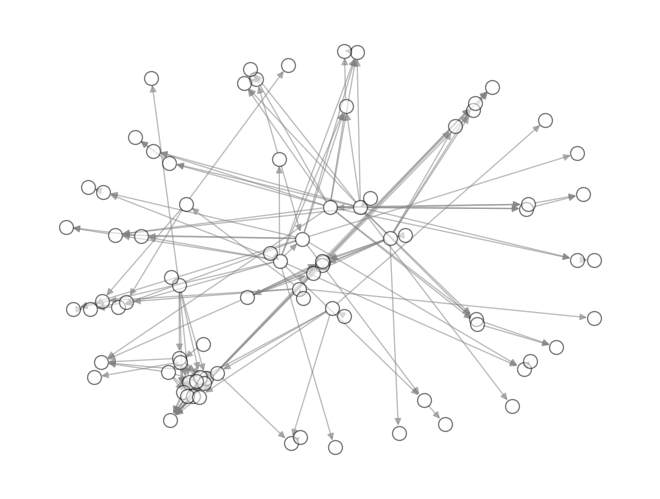

In [46]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(knowledge_graph, seed=42)  # positions for all nodes
nx.draw(knowledge_graph, pos, with_labels=False, node_size=100, node_color='white',
        edge_color='gray',
        edgecolors='black', alpha=0.5)
plt.show()

We can now add a new field: page rank score. We first compute them using the networkx library.

In [33]:
import networkx as nx
ranks = nx.pagerank(knowledge_graph)

We can take a look at the ranks of the first 10 nodes.

In [35]:
for node in list(ranks)[:10]:
    print(node, '/rank:', ranks[node])

477e90bf-00a4-5a57-8cf3-e8356589c7b0 /rank: 0.011983503197469122
3f848ed6-902f-5a8e-9577-cb67f8c17acd /rank: 0.009564733254170784
d3d7b6b4-9b0d-52e8-9e09-a9e9cf4b5a4d /rank: 0.09735406627276527
0af613e0-c11b-550d-ada2-2c2aa6550884 /rank: 0.009564733254170784
5534e0b0-d0c4-5ab9-82e9-91bed36f70bd /rank: 0.009564733254170784
07abb24b-b37c-5b09-b324-56299caad6d7 /rank: 0.008174864186633966
73ae630f-7b09-5dce-8c18-45d0a57b30f9 /rank: 0.008174864186633966
d072ba0f-e1a9-58bf-9974-e1802adc8134 /rank: 0.01325094347947368
04a91fef-8a07-5d50-8f1b-46f3afeec497 /rank: 0.009564733254170784
a9067029-f029-5cbe-b089-19fd7b2f5106 /rank: 0.011983503197469122


Finally, we can get a feeling of the distribution of the ranks.

Text(0.5, 1.0, 'Page rank distribution')

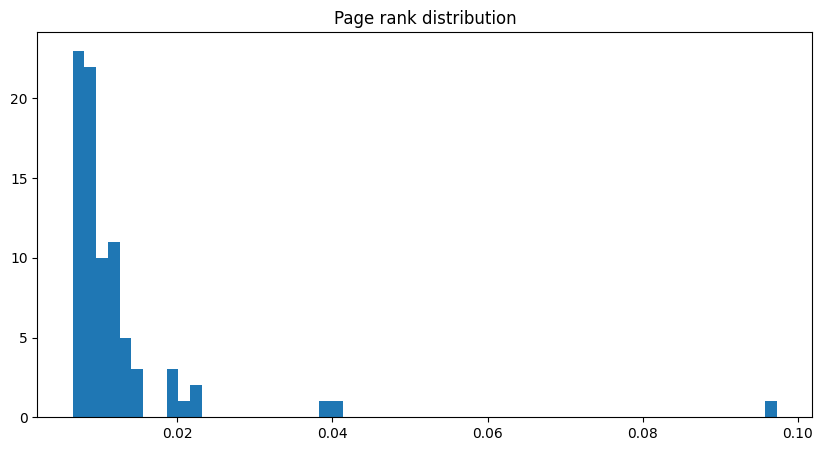

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist(list(ranks.values()), bins=60)
plt.title('Page rank distribution')

As we can see, some nodes have a very high score, while most of them are around 0.01. Let's see
the data of the node with the highest score.

In [51]:
# Sort the ranks dictionary by value in descending order
sorted_ranks = sorted(ranks.items(), key=lambda x: x[1], reverse=True)

In [52]:
sorted_ranks[0]

(UUID('d3d7b6b4-9b0d-52e8-9e09-a9e9cf4b5a4d'), 0.09735406627276527)

In [53]:
knowledge_graph.nodes[sorted_ranks[0][0]]  # get the node data

{'created_at': 1745330018533,
 'updated_at': datetime.datetime(2025, 4, 22, 13, 53, 38, 533000, tzinfo=datetime.timezone.utc),
 'ontology_valid': False,
 'version': 1,
 'topological_rank': 0,
 'metadata': {'index_fields': ['name']},
 'type': 'EntityType',
 'name': 'organization',
 'description': 'organization',
 'id': UUID('d3d7b6b4-9b0d-52e8-9e09-a9e9cf4b5a4d')}